# Red Wine Quality Prediction

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Installing imblearn which could be used for balancing the imbalanced classes
!pip install imblearn

In [3]:
# Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# This is the dataset, 
# we have 1599 rows(0-1598).
# We have 12 columns(0-11).
# We can also infer from here that the target column is "Quality" and its contains categorical data (has classes 0-10), hence is a 
# Classification Problem
# We need to use Classification models to perform our predictions.

# Exploratory Data Analysis(EDA)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
# df.tail() displays the last 5 row values(indexed from 1594-1598) from the dataset

In [10]:
df.shape

(1599, 12)

In [11]:
# No. of rows - 1599
# No. of columns - 12

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
# df.columns gives the names of the column headings

In [14]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
# All the independent variables is of float datatype
# The dependent variable or the target column is of integer datatype

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# The info that we can infer from df.info() is as below
# Total entries are 1599(0-1598)
# Total data columns is 12
# Each data column contains no null values, hence the non-null count is 1599 for all the 12 columns
# All the independent variables have float values, hence datatype is float
# The dependent variable or the target column has integer values and hence the datatype is integer
# This also gives info on the memory usage



In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
# This shows that there are no null values in our dataset

In [20]:
np.where(pd.isnull(df)) #This is to find the location if incase null values are present in the dataset

(array([], dtype=int64), array([], dtype=int64))

In [21]:
# This proves that there are no missing entry or a NaN entry in our dataset as already verified in df.isnull().sum()

In [22]:
# Trying to find the duplicate rows in our dataset
duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the dataset
df[duplicate]               # prints the duplicate rows in the dataset

240


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [23]:
# dropping the duplicates from our dataset
df.drop_duplicates(inplace=True)     

In [24]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
# After removing the duplicates we have 1359 rows in the dataset

In [26]:
df.shape

(1359, 12)

In [27]:
# Lets find the dataloss after removing duplicates

In [28]:
Dataloss=((1599-1359)/1599)*100

In [29]:
Dataloss

15.0093808630394

In [30]:
# So after removing the duplicaates we find 15% Dataloss, hence just the duplicates were contributing 15% to our data which is 
# not at all negligible, hence decided to remove it

In [31]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [33]:
# This df.info() is being performed after removing the outliers
# Total entries are 1359
# Total data columns is 12
# Each data column contains no null values, hence the non-null count is 1359 for all the 12 columns
# All the independent variables have float values, hence datatype is float
# The dependent variable or the target column has integer values and hence the datatype is integer
# This also gives info on the memory usage


In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
# From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
# So from min and max values, we basically get the range

In [36]:
df["quality"].unique()  

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [37]:
# This is showing the various classes present in the target column, so there are 6 different classes with value(5,6,7,4,8,3)

In [38]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [39]:
# This gives the count of the values present in the target variable "Quality" for all the classes.

# Data Visualization

# Uni-Variant Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

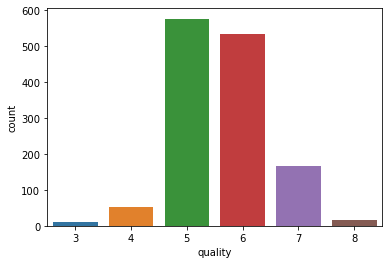

In [40]:
sns.countplot(df["quality"])

In [41]:
# From here we can infer that the wine quality in our dataset ranges from 3 to 8
# The large set of wines (ie.,577) in our dataset scores 5
# Least set of wines are scored as 3 and 8 (10 red wine has the quality score of 3 and 17 red wine has the quality score of 8)
# 535 no. of wines have quality score of 6
# 167 no. of wines have quality score of 7
# 53 no. of wines have quality score of 4
# Here we have Class Imbalance

# Bi-Variant Analysis

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

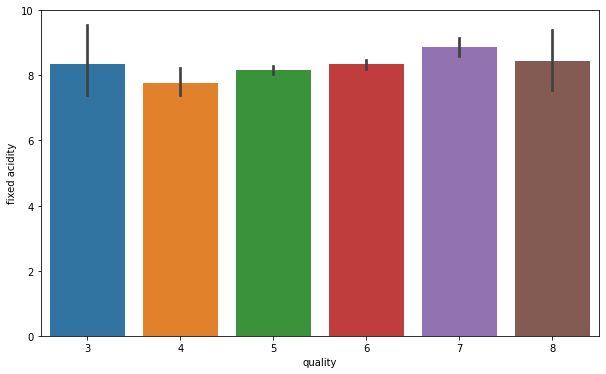

In [42]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

In [43]:
# We see that fixed acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

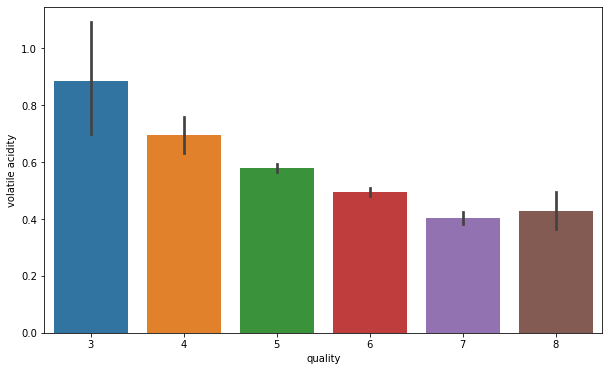

In [44]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

In [45]:
# Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

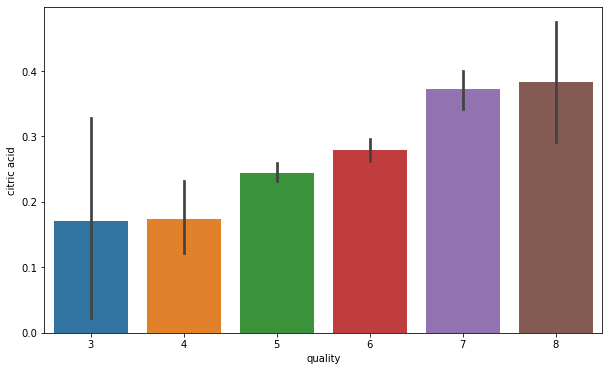

In [46]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

In [47]:
# Composition of citric acid go higher as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

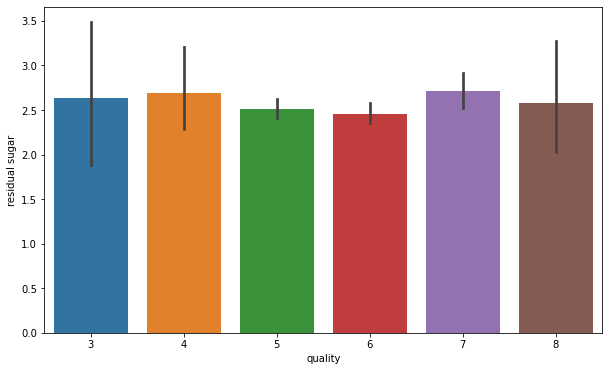

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

In [49]:
# We see that residual sugar does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

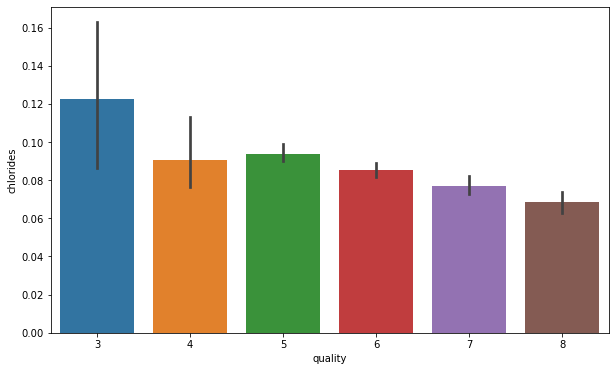

In [50]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

In [51]:
# Composition of chloride also go down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

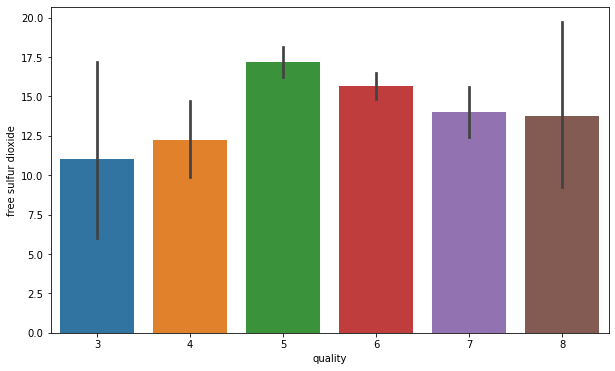

In [52]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

In [53]:
# We see that free sulfur dioxide does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

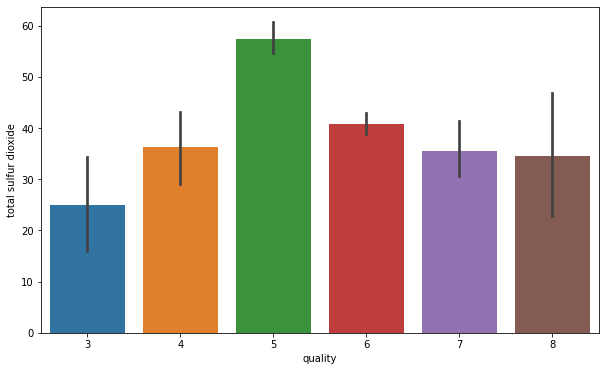

In [54]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

In [55]:
# We see an increase in total sulfur dioxide with increase in quality(till score of 5) and we see a gradual decrease in the total sulfur 
# dioxide with the increase in quality rangin from 6, 7 and 8.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

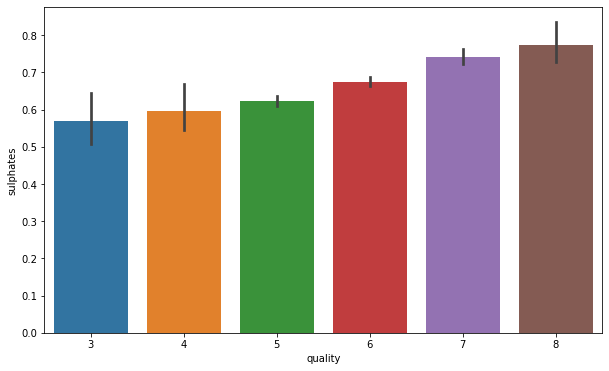

In [56]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

In [57]:
# Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

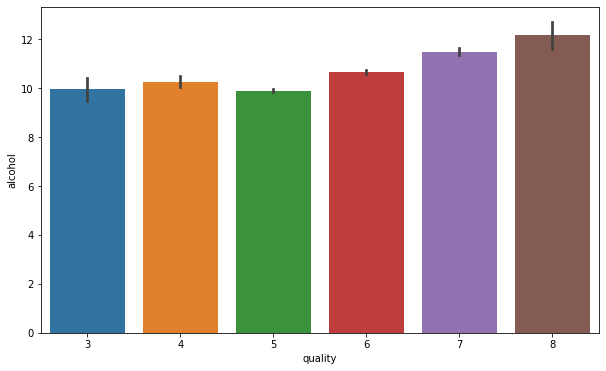

In [58]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [59]:
# Alcohol level also goes higher as the quality of wine increases

<AxesSubplot:xlabel='quality', ylabel='pH'>

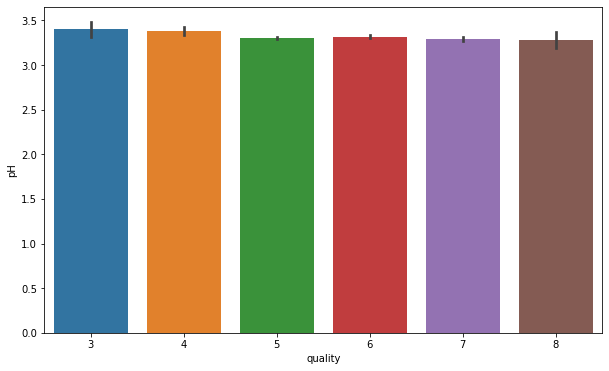

In [60]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

In [61]:
# The pH values is almost same for quality range from 3-8

<AxesSubplot:xlabel='quality', ylabel='density'>

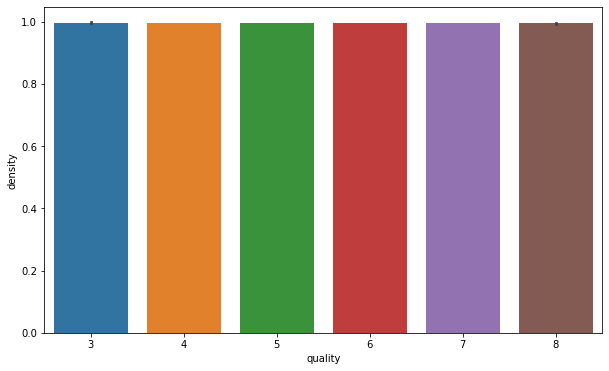

In [62]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

In [63]:
# Even the density remains same for all the classes present in our target column.

# Multivariant Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'fixed acidity'),
  Text(0, 1.5, 'volatile acidity'),
  Text(0, 2.5, 'citric acid'),
  Text(0, 3.5, 'residual sugar'),
  Text(0, 4.5, 'chlorides'),
  Text(0, 5.5, 'free sulfur dioxide'),
  Text(0, 6.5, 'total sulfur dioxide'),
  Text(0, 7.5, 'density'),
  Text(0, 8.5, 'pH'),
  Text(0, 9.5, 'sulphates'),
  Text(0, 10.5, 'alcohol'),
  Text(0, 11.5, 'quality')])

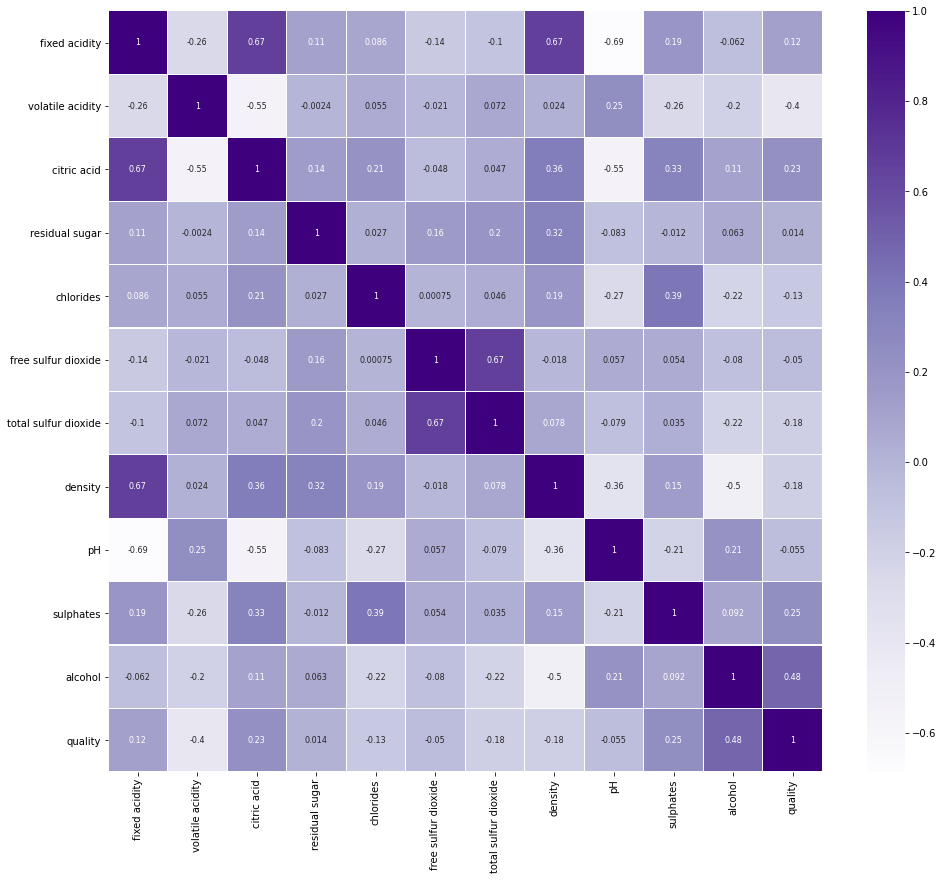

In [64]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)


In [65]:
# From this heatmap we have got the correlation values and we can see that the column "alcohol" has high positive 
# correlation with the target column compared to all other columns
# So the higher the value of alcohol, higher is the Quality of wine
# We can also observe that the columns "Sulphates" and "Citric acid" also have good correlation with the target column
# The column "pH" and "residual sugar" have the weak negative correlation value(-0.055 and -0.014) with the target variable(not a very important
# factor because the correlation value is close to zero)


In [66]:
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [67]:
# This is the correlation values for our dataset which we saw visually using the heatmap
# We can clearly see that the columns pH, free sulphur dioxide and residual sugar have very less correlation with the target column
# Hence trying to drop them here

In [68]:
# Representing which columns have positive and negative correlations with the target column

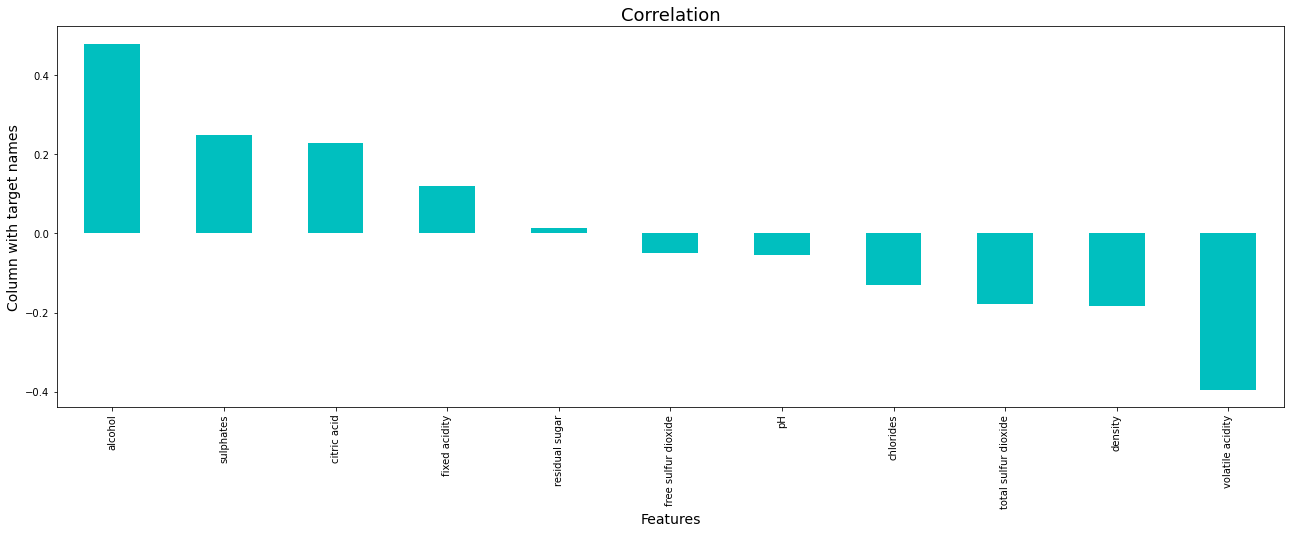

In [69]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(["quality"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [70]:
# We see that pH, residual sugar and free sulphur dioxide are very less correlated with the target column, lets drop them

In [71]:
df.drop(['pH', 'residual sugar','free sulfur dioxide'],axis = 1,inplace=True)

In [72]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
5,7.4,0.660,0.00,0.075,40.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,38.0,0.99651,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


In [73]:
# Here we can see that the columns 'pH','residual sugar' and 'free sulphur dioxide' are successfully removed and now that we
# have 9 columns in our dataset.

In [74]:
# Checking for the presence of outliers for our modified dataset individually

<AxesSubplot:xlabel='fixed acidity'>

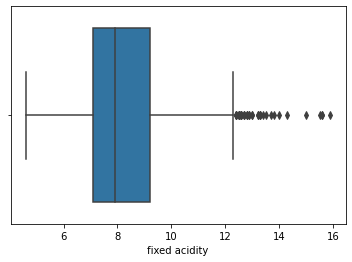

In [75]:
sns.boxplot(df["fixed acidity"])

In [76]:
# We can see that the outliers are present for the column fixed acidity

<AxesSubplot:xlabel='volatile acidity'>

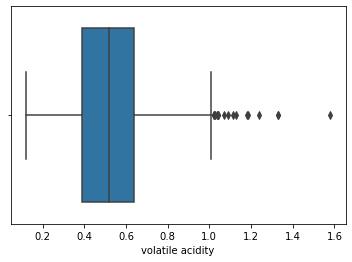

In [77]:
sns.boxplot(df["volatile acidity"])

In [78]:
# Even here we can witness the presence of outliers

<AxesSubplot:xlabel='citric acid'>

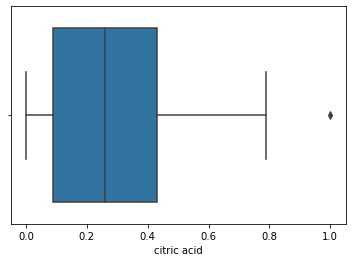

In [79]:
sns.boxplot(df["citric acid"])

In [80]:
# There is just one outlier point present in the column citric acid

<AxesSubplot:xlabel='chlorides'>

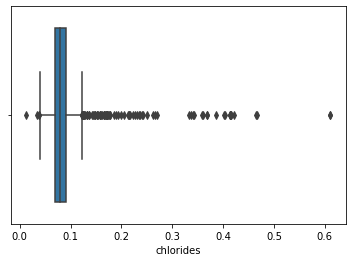

In [81]:
sns.boxplot(df["chlorides"])

In [82]:
# There is a large set of outliers present in chlorides

<AxesSubplot:xlabel='total sulfur dioxide'>

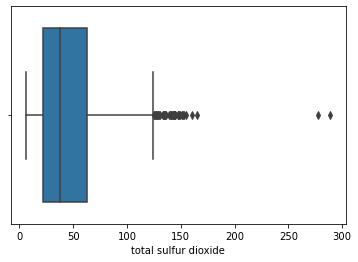

In [83]:
sns.boxplot(df["total sulfur dioxide"])

In [84]:
# Presence of outliers is evident

<AxesSubplot:xlabel='density'>

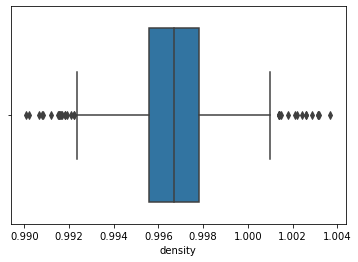

In [85]:
sns.boxplot(df["density"])

In [86]:
# Presence of outliers in density column too

<AxesSubplot:xlabel='sulphates'>

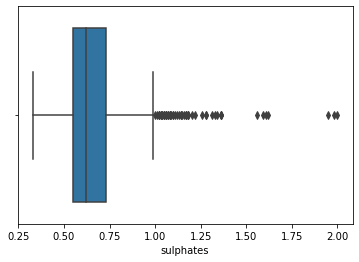

In [87]:
sns.boxplot(df["sulphates"])

In [88]:
# Presence of outliers in sulphates column too

<AxesSubplot:xlabel='alcohol'>

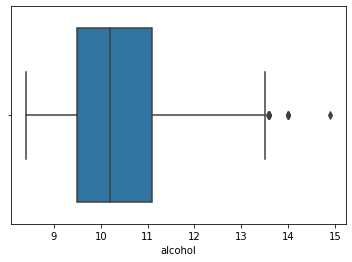

In [89]:
sns.boxplot(df['alcohol'])

In [90]:
# Few outliers present in the alcohol column

In [91]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
chlorides               5.502487
total sulfur dioxide    1.540368
density                 0.044778
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

In [92]:
# We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of few columns outside the above mentioned range and they need to be treated. The columns with high skewness 
# are "fixed acidity", "volatile acidity", "alcohol".
# We can observe that we have very high skewness for the columns "total sulfur dioxide", "sulphates" and "chlorides" 
# Comparatively "chlorides" have very high skewness compared to all others
# Skewness for "citric acid","density" and "quality" is in acceptable range.

# Considering to remove the outliers

In [93]:
df.shape

(1359, 9)

In [94]:
# So this is the shape of our dataset before removing the outliers
# We have 1359 rows and 9 columns

In [95]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  11,   13,   15,   15,   17,   35,   38,   39,   75,   75,   77,
          80,   82,   85,   96,   96,   99,  114,  115,  127,  135,  135,
         135,  150,  150,  159,  176,  202,  202,  211,  214,  226,  226,
         245,  252,  295,  296,  302,  309,  328,  334,  385,  385,  393,
         400,  408,  420,  448,  450,  473,  483,  483,  485,  485,  492,
         510,  513,  528,  534,  555,  562,  564,  565,  565,  582,  582,
         592,  597,  597,  599,  626,  627,  632,  652,  671,  672,  687,
         710,  718,  722,  764,  771,  866,  895,  895,  918,  920,  948,
         994, 1060, 1073, 1081, 1081, 1082, 1082, 1106, 1106, 1117, 1123,
        1123, 1159, 1162, 1165, 1165, 1216, 1245, 1250, 1253, 1276],
       dtype=int64),
 array([6, 4, 3, 6, 3, 1, 3, 6, 3, 6, 3, 6, 6, 6, 3, 6, 4, 1, 1, 7, 2, 3,
        6, 3, 6, 3, 1, 3, 6, 3, 0, 3, 6, 3, 3, 6, 6, 0, 4, 0, 0, 0, 5, 3,
        8, 7, 5, 4, 8, 0, 0, 5, 0, 5, 3, 7, 4, 5, 6, 6, 4, 4, 0, 7, 1, 4,
        4, 1, 8, 3, 6,

In [96]:
df_new_z=df[(z<3).all(axis=1)] 
df_new_z

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
5,7.4,0.660,0.00,0.075,40.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,38.0,0.99651,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


In [97]:
df_new_z.shape  # info of data after removing outliers

(1270, 9)

In [98]:
# Calculating the percentage of data loss

In [99]:
Data_loss=((1359-1270)/1359)*100

In [100]:
Data_loss

6.548933038999265

In [101]:
# So here we can see that we have lost nearly 6-6.5 % of data after removing the outliers and is acceptable

In [102]:
df_new_z.skew()   # skewness is reduced comparitively

fixed acidity           0.778516
volatile acidity        0.408849
citric acid             0.291205
chlorides               2.483800
total sulfur dioxide    1.115118
density                 0.009131
sulphates               0.950304
alcohol                 0.759273
quality                 0.395537
dtype: float64

In [103]:
df_new_z.describe() 

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,8.270551,0.524669,0.264827,0.081836,45.396457,0.996679,0.642165,10.434541,5.645669
std,1.659331,0.171935,0.190501,0.023101,30.788657,0.001742,0.130346,1.049750,0.792275
min,4.600000,0.120000,0.000000,0.034000,6.000000,0.991500,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,0.070000,22.000000,0.995585,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,0.079000,37.000000,0.996685,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,0.089000,61.000000,0.997800,0.710000,11.100000,6.000000
max,13.500000,1.070000,0.790000,0.236000,147.000000,1.002200,1.170000,13.600000,8.000000


In [104]:
# info on count,mean.std,min and max after dropping few columns, removing outliers and skewness

<AxesSubplot:xlabel='quality', ylabel='Density'>

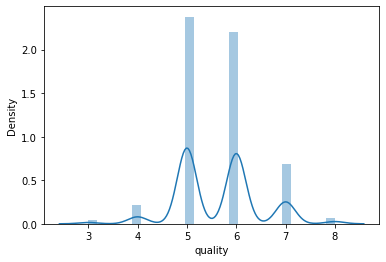

In [105]:
sns.distplot(df['quality'],kde=True)

In [106]:
# Here we have the distribution of wine over various classes ranging from 3 to 8. Let's try to create a binary class of 0 and 1
# Class 1 indicating good quality wine
# Class 0 indicating bad/poor quality wine

In [107]:
df_new_z['best quality']=[1 if x>6 else 0 for x in df_new_z.quality]
print(df_new_z)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
5               7.4             0.660         0.00      0.075   
...             ...               ...          ...        ...   
1593            6.8             0.620         0.08      0.068   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      total sulfur dioxide  density  sulphates  alcohol  quality  best quality  
0                     34.0  0.99780       0.56      9.4        5             0  
1                     67.0  0.99680       0.68      9.8  

In [108]:
# Here I'm creating a new column called "best quality" and assigning the value 1(indicating good quality wine) for all the values
# >6 and 0 for the quality <= 6(indicating bad/poor wine quality)
# Now since we have added a new column, now total column is 10

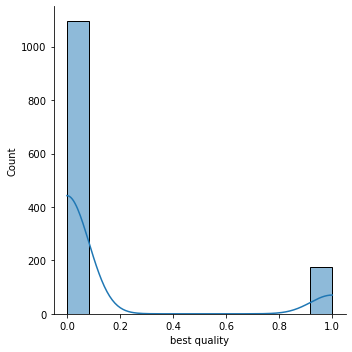

In [109]:
sns.displot(df_new_z['best quality'],kde=True)

In [110]:
# This gives the distribution of our column best quality. Better we can go for countplot for the target classes

<AxesSubplot:xlabel='best quality', ylabel='count'>

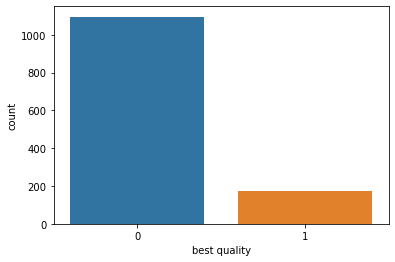

In [111]:
sns.countplot(df_new_z['best quality'])

In [112]:
df_new_z['best quality'].value_counts()

0    1096
1     174
Name: best quality, dtype: int64

In [113]:
# Here we can clearly see that the classes 0 and 1 are not balanced
# Lets try to balance them first

In [114]:

# We need to split the data into X and y before we could try balancing the classes
# Splitting the dataset into X features and y label

X = df_new_z.drop(["quality","best quality"],axis=1)
y = df_new_z["best quality"]

In [115]:
# Applying over-sampling to balance our classes

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [116]:
y.value_counts()

1    1096
0    1096
Name: best quality, dtype: int64

In [117]:
# Now that we see that our classes are balanced
# Class 0 has 1096 values
# Class 1 has 1096 values

In [118]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.08539133 0.11910091 0.11174702 0.07165907 0.11330151 0.08415465
 0.16638715 0.24825837]


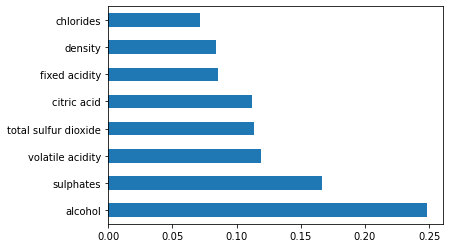

In [119]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [120]:
# This proves the very important feature is "alcohol"

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Finding the best random state

In [122]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8829787234042553  on Random_state  46


In [123]:
# The best random state is 46 for the best accuracy score of 0.883

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =46) 

# Standardizing the data

In [125]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [126]:
# performed train test split with the found best random state

In [127]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
pred =DTC.predict(X_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       331
           1       0.81      0.87      0.84       327

    accuracy                           0.84       658
   macro avg       0.84      0.84      0.84       658
weighted avg       0.84      0.84      0.84       658



In [128]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 84% Accuracy using DecisionTreeClassifier

In [129]:
# Lets try to check the Accuracy using Random Forest
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
pred= RFC.predict(X_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       331
           1       0.87      0.94      0.90       327

    accuracy                           0.90       658
   macro avg       0.90      0.90      0.90       658
weighted avg       0.90      0.90      0.90       658



In [130]:
# The accuracy score obtained by Random Forest Classifier is 90%

In [131]:
# Let's try to check the Accuracy using SupportVectorClassifier
SV=SVC()
SV.fit(X_train,y_train)
pred=SV.predict(X_test)
acc=classification_report(y_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.91      0.83      0.87       331
           1       0.84      0.92      0.88       327

    accuracy                           0.88       658
   macro avg       0.88      0.88      0.88       658
weighted avg       0.88      0.88      0.88       658



In [132]:
# The accuracy score obtained by SupportVector Classifier is 88%

In [133]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [134]:
acc=classification_report(y_test,pred)
print(acc)               

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       331
           1       0.84      0.92      0.88       327

    accuracy                           0.88       658
   macro avg       0.88      0.88      0.88       658
weighted avg       0.88      0.88      0.88       658



In [135]:
# The accuracy score obtained by SGD Classifier is 88%

In [136]:
# All these accuracy score may also be due to overfitting, so just can't decide with the accuracy score
# 1) Lets find the cross validation score first 
# 2) lets find the difference of accuracy score and cross validation score

# The model with the least difference is the best model


In [137]:
print(cross_val_score(DTC,X,y,cv=5).mean())

0.8375947826629637


In [138]:
# The cross validation score for DecisionTreeClassifier isalmost 83.75%

In [139]:
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8918775548413269


In [140]:
# The cross validation score for RandomForestClassifier is 89.6 almost equal to (89.2%)

In [141]:
print(cross_val_score(SV,X,y,cv=5).mean())

0.7089191916039983


In [142]:
# The cross validation score for SupportVectorClassifier is 70.89%

In [143]:
print(cross_val_score(sgd,X,y,cv=5).mean())

0.7883150788945402


In [144]:
# The cross validation score for SupportVectorClassifier is almost 79%

In [145]:
# The differnce between the accuracy score and cross validation score for DTC is 0.25%
# The differnce between the accuracy score and cross validation score for RFC is 0.82%
# The differnce between the accuracy score and cross validation score for SVC is 17.11%
# The differnce between the accuracy score and cross validation score for SGD is 9.2%

In [146]:
# So the best model here for our Dataset is RandomForestClassifier

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Fit the model
logreg = LogisticRegression(C=1e5)
logreg.fit(X,y)

y_pred = logreg.predict(X)
acc=classification_report(y,y_pred)
print(acc)               
#confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1096
           1       0.81      0.86      0.84      1096

    accuracy                           0.83      2192
   macro avg       0.83      0.83      0.83      2192
weighted avg       0.83      0.83      0.83      2192

[[878 218]
 [149 947]]


In [ ]:
# The accuracy score obtained by Logistic Regression is 83%

In [151]:
print(cross_val_score(logreg,X,y,cv=5).mean())

0.8156894561113365


In [ ]:
# The cross validation score for Logistic regression is almost 81.56%

In [ ]:
# The differnce between the accuracy score and cross validation score for LogisticRegression is 1.44%

In [ ]:
# The best model is Decision Tree Algorithm and it has the least difference.

# Hyper Parameter Tuning 

In [ ]:
# Performing hyper-paramter tuning only on the best model ie.,DecisionTreeClassifier

In [175]:
# importing the GridSearchCV
from sklearn.model_selection import GridSearchCV



In [179]:
# Choosing the parameters
parameter = {'max_depth': np.arange(2,50),
             'criterion':['gini','entropy'],
            'max_features':["auto","sqrt","log2"],
             'splitter':['best', 'random'],
             'min_samples_split': [2, 3, 4]
              }

In [180]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [ ]:
# Fitting the model to the train data
GCV.fit(X_train,y_train)

In [173]:
# Finding the best parameters using GridSearchCV
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'log2',
 'min_samples_split': 2,
 'splitter': 'best'}

In [174]:
# Hyper paramter tuning for best model(DecisionTreeClassifier)
Final_mod = DecisionTreeClassifier(criterion='entropy',max_depth=44,max_features='auto',min_samples_split=2,splitter='best')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.1063829787234


In [ ]:
# By using grid search for best paramters we have increased the performance comparatively.

# Saving the model

In [ ]:
# Serializing or saving the model
# Importing the necessary library for saving the model
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

In [ ]:
# Model is saved 